In [ ]:
import numpy as np

file_path = '/content/drive/MyDrive/mnist.npz'
file = np.load(file_path)

x_train, y_train = file['x_train'], file['y_train']
x_test, y_test = file['x_test'], file['y_test']
file.close()


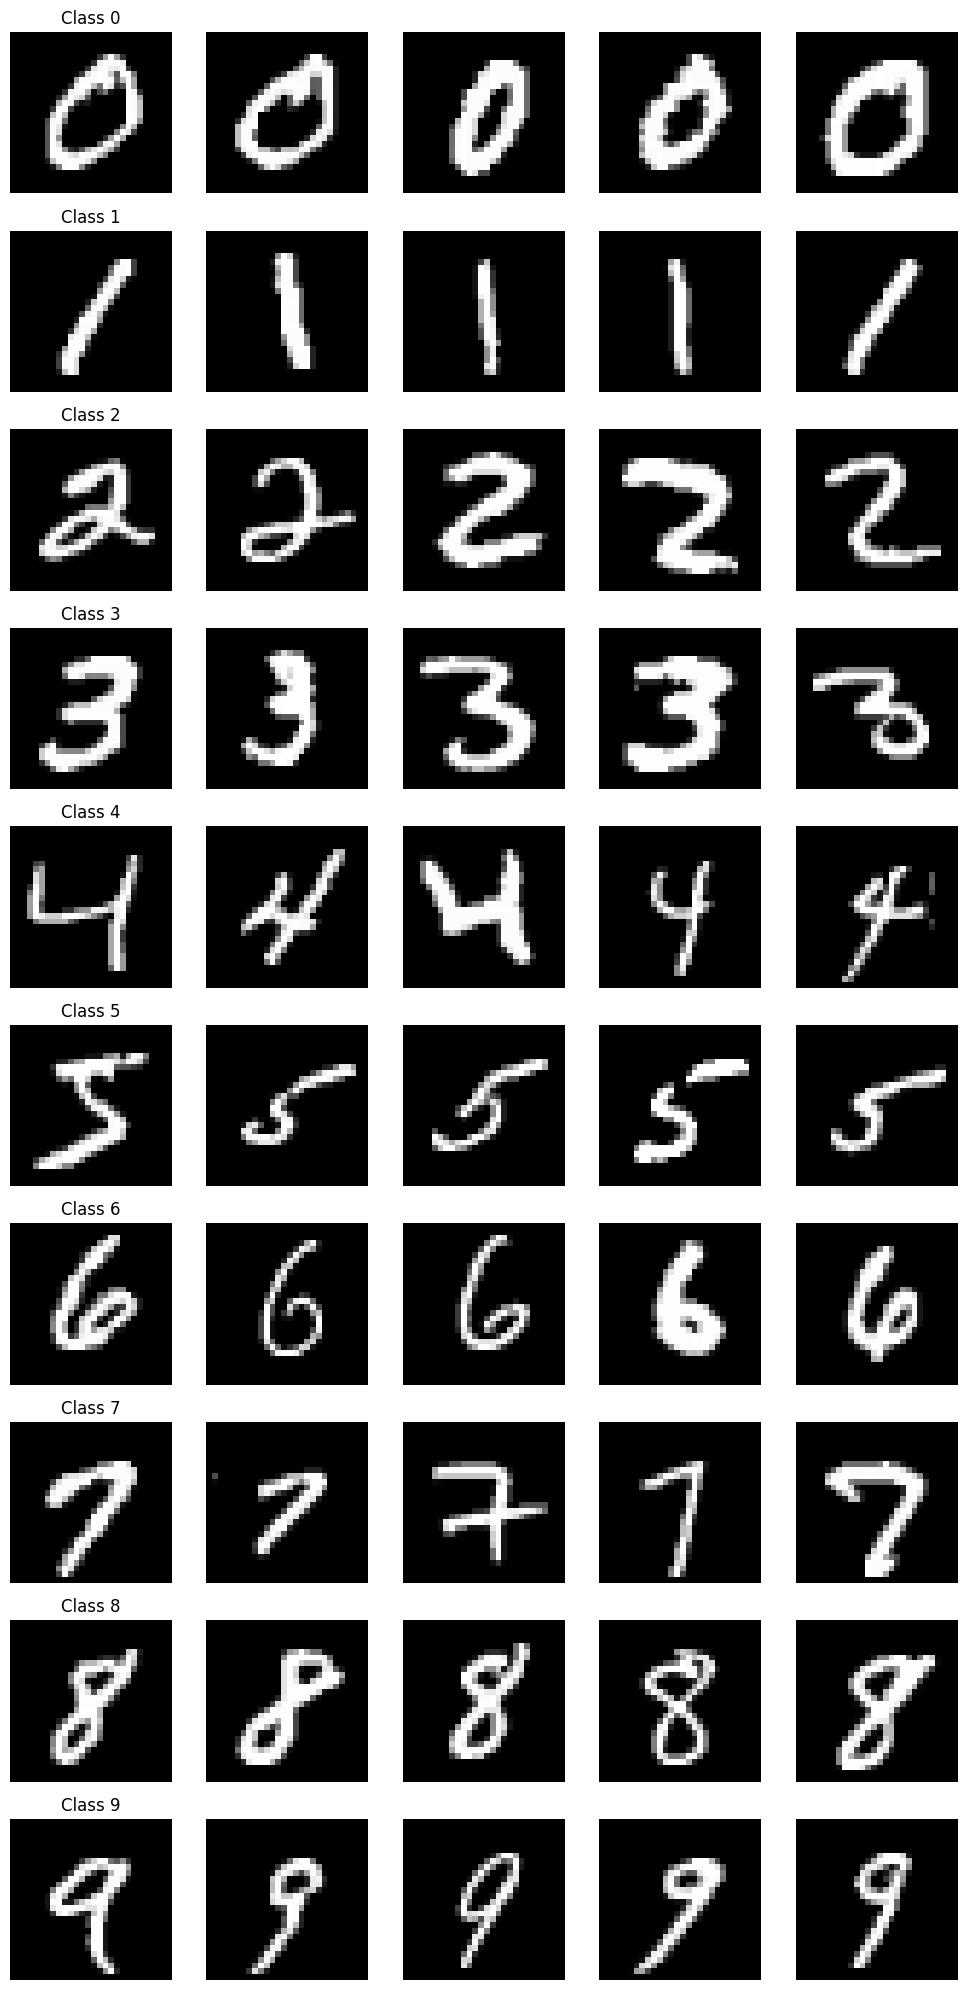

In [ ]:
import matplotlib.pyplot as plt

samples_per_class = {i: [] for i in range(10)}
for i in range(len(x_train)):
    class_label = y_train[i]
    if len(samples_per_class[class_label]) < 5:
        samples_per_class[class_label].append(x_train[i])
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10, 20))

for i in range(10):
    for j in range(5):
        axes[i, j].imshow(samples_per_class[i][j], cmap='gray')
        axes[i, j].axis('off')
for ax, label in zip(axes[:, 0], range(10)):
    ax.set_title('Class %d' % label)

plt.tight_layout()
plt.show()

In [ ]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [ ]:
def c_mu_sigma(data, labels):
    mu = []
    sigma = []

    for class_label in range(10):
        class_samples = data[labels == class_label]

        add_mean = np.mean(class_samples, axis=0)
        mu.append(add_mean)

        add_cov = np.cov(class_samples, rowvar=False)
        sigma.append(add_cov)

    mu = np.array(mu)
    sigma = np.array(sigma)
    return mu, sigma

In [ ]:
X_1, X_2 = c_mu_sigma(x_train_flat, y_train)
def qda(x, mu_total, sigma_total, priors):
    num_classes = len(mu_total)
    class_scores = []
    for i in range(num_classes):
        mu = mu_total[i]
        covariance = sigma_total[i]

        det = np.linalg.det(covariance)

        if det == 0:
            det = 1e-6

        inverse_covariance_matrix = np.linalg.pinv(covariance)

        centered_x = x - mu
        exponent = -0.5 * np.sum(centered_x.dot(inverse_covariance_matrix) * centered_x, axis=1)

        class_scores.append(exponent + 0.5 * np.log(det) + np.log(priors[i]))

    return np.argmax(class_scores, axis=0)



In [ ]:
num_samples = len(y_test)
unique_labels, label_counts = np.unique(y_train, return_counts=True)
priors = label_counts / num_samples

predicted_labels_test = qda(x_test_flat, X_1, X_2, priors)
overall_accuracy_test = np.mean(predicted_labels_test == y_test)
print("Accuracy for the test set:", overall_accuracy_test*100,"%")

class_accuracy_test = {}
for class_label in range(10):
    class_indices_test = np.where(y_test == class_label)[0]
    correct_predictions_test = np.sum(predicted_labels_test[class_indices_test] == class_label)
    class_accuracy_test[class_label] = correct_predictions_test / len(class_indices_test)

print("Class-wise Accuracy for Test Set:")
for class_label, acc in class_accuracy_test.items():
    print(f"Class {class_label}: {acc * 100} %")


Accuracy for the test set: 85.72 %
Class-wise Accuracy for Test Set:
Class 0: 93.46938775510203 %
Class 1: 67.40088105726872 %
Class 2: 93.6046511627907 %
Class 3: 87.52475247524752 %
Class 4: 90.93686354378818 %
Class 5: 79.93273542600897 %
Class 6: 89.03966597077245 %
Class 7: 86.38132295719845 %
Class 8: 88.80903490759754 %
Class 9: 82.1605550049554 %


In [ ]:
for i in range(10):
  print(x_train[y_train==i].size//784)

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949
